In [27]:
# I imported modules i believe i will use
# Import TensorFlow and Keras to build and train the deep learning model
# Matplotlib and seaborn for plotting graphs and confusion matrix
# NumPy for array operations
# sklearn.metrics for performance evaluation

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [28]:
# firstly i imported the fashion_mnist dataset,, 2nd i loaded the data
# Load the Fashion MNIST dataset from TensorFlow, which contains 28x28 grayscale images of 10 clothing categories
# Reshape the data to add a single channel (1) for CNN input (Height x Width x Channels)
# Normalize pixel values from [0, 255] to [0, 1] to help the model learn faster

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [29]:
# In this cell i was normalizing my data, making sure that it's compatible with CNN
# Load the Fashion MNIST dataset from TensorFlow, which contains 28x28 grayscale images of 10 clothing categories
# Reshape the data to add a single channel (1) for CNN input (Height x Width x Channels)
# Normalize pixel values from [0, 255] to [0, 1] to help the model learn faster

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

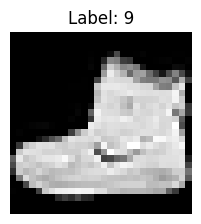

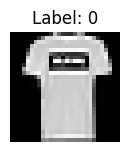

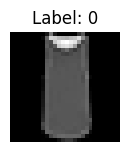

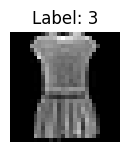

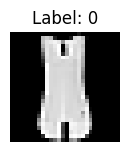

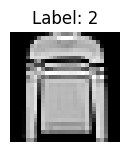

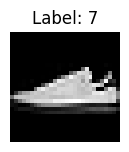

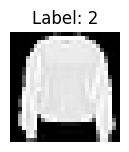

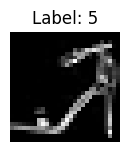

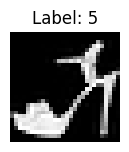

In [30]:
# I want to visualize my raw data before i carry on
plt.figure(figsize=(10, 14))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [32]:
# now the structure of the model, its architecture
# Create a CNN model using Keras Sequential API
# Conv2D layer with 32 filters, kernel size 3x3, ReLU activation – detects patterns in the image
# MaxPooling reduces spatial dimensions and keeps important features
# Another Conv2D and MaxPooling to go deeper and learn more complex features
# Flatten converts the 2D matrix into a 1D array for the Dense layer
# Dense layer with 64 neurons learns complex patterns
# Output layer with 10 neurons (one for each class), softmax activation gives probability distribution

model = models.Sequential([layers.Conv2D(32, (3,3),
                                         activation = 'relu', input_shape=(28, 28, 1)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,(3,3),
                                         activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Flatten(),
                           layers.Dense(128, activation='relu'),
                           layers.Dropout(0.3),
                           layers.Dense(10, activation='softmax')
                           ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#Putting together the model or model compiling
# Compile the model using Adam optimizer (efficient gradient descent)
# sparse_categorical_crossentropy is used as labels are integers (not one-hot encoded)
# We want to track 'accuracy' as a metric during training and testing

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# model training
# Train the model on the training data for 10 epochs (iterations over the full dataset)
# Also validate the model on the test set after each epoch to monitor performance

history = model.fit(x_train, y_train, epochs=10,batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.7225 - loss: 0.7750 - val_accuracy: 0.8648 - val_loss: 0.3724
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.8630 - loss: 0.3787 - val_accuracy: 0.8803 - val_loss: 0.3128
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.8826 - loss: 0.3206 - val_accuracy: 0.8858 - val_loss: 0.2965
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.8969 - loss: 0.2867 - val_accuracy: 0.8990 - val_loss: 0.2669
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9046 - loss: 0.2612 - val_accuracy: 0.9088 - val_loss: 0.2543
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9118 - loss: 0.2423 - val_accuracy: 0.9103 - val_loss: 0.2443
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.9202 - loss: 0.2181 - val_accuracy: 0.9077 - val_loss: 0.2490
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.9242 - loss: 0.2062 - 

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9028 - loss: 0.2706
Test accuracy: 0.9073


Text(0.5, 1.0, 'Accuracy')

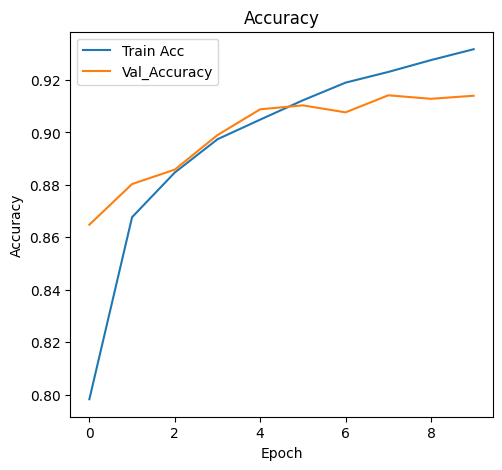

In [36]:
# now wanna see my accuracy i'll visualize it for better understanding
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')


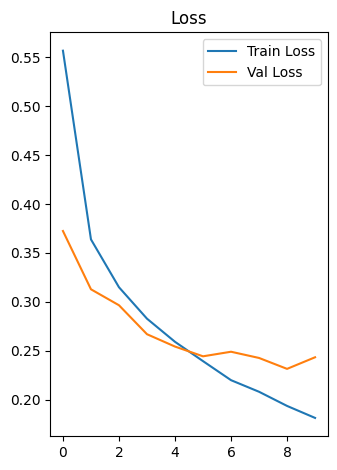

In [37]:
# loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# Report
# Print precision, recall, f1-score, and support for each class

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.84      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.81      0.89      0.85      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.90      0.79      0.84      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.72      0.74      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [42]:
# Predict the class probabilities for the test set
# Use np.argmax to convert probabilities into actual class labels

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


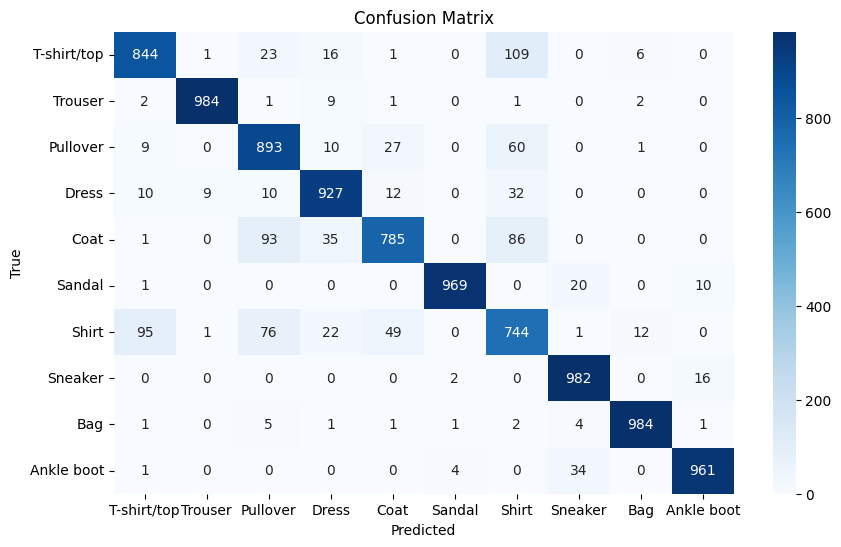

In [40]:
# Generate a confusion matrix to visualize true vs. predicted class labels
# Use seaborn heatmap to display the matrix for better interpretability

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

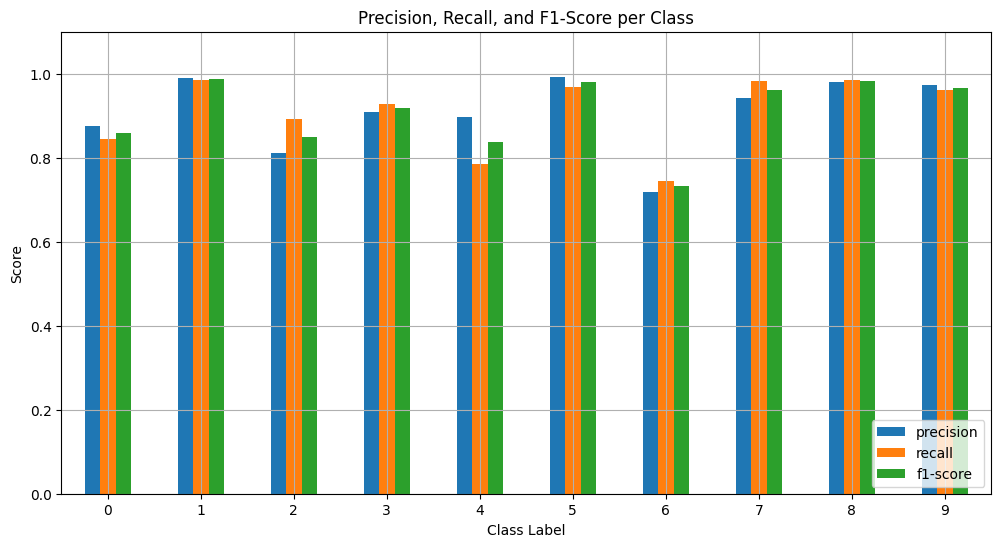

In [41]:
from sklearn.metrics import classification_report
import pandas as pd

# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_classes, output_dict=True)

# Convert the dictionary to a DataFrame for better display
report_df = pd.DataFrame(report_dict).transpose()

# Filter only the actual class metrics (ignore avg/total for now)
class_metrics = report_df.iloc[:10, :3]  # first 10 rows, first 3 columns (precision, recall, f1-score)

# Plot the metrics
class_metrics.plot(kind='bar', figsize=(12,6))
plt.title('Precision, Recall, and F1-Score per Class')
plt.ylabel('Score')
plt.xlabel('Class Label')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()
